# Behavioral Cloning



This is the Project 3 in Self Driving Car Nano degree from Udacity

## Behavioral Cloning Project

The goals / steps of this project are the following:

- Use the simulator to collect data of good driving behavior
- Build, a convolution neural network in Keras that predicts steering angles from images
- Train and validate the model with a training and validation set
- Test that the model successfully drives around track one without leaving the road
- Summarize the results with a written report

## Rubric Points

Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I addressed each point in my implementation.

### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:

    model.ipynb containing the script to create and train the model
    drive.py for driving the car in autonomous mode
    model.h5 containing a trained convolution neural network
    writeup_report.md or writeup_report.pdf summarizing the results
#### 2. Submission includes functional code Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing

    python drive.py model.h5
#### 3. Submission code is usable and readable

The model.ipynb file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.



### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

My model is based on model proposed by the NVIDIA in [this paper](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf). The NVIDIA model is well-documented and not complicated and has been proven its effectiveness in self driving car control.

The model architecture is summarized as follows:

Layer        | Description
------------ | -------------
Input	| 66x200x3 RGB image
Lambda | Normalized
Convolution 5x5x24 | valid padding, subsample(2,2), activation ReLU, outputs 31x98x24
Convolution 5x5x36 | valid padding, subsample(2,2), activation ReLU, outputs 14x47x36
Convolution 5x5x48 | valid padding, subsample(2,2), activation ReLU, outputs 5x22x48
Convolution 3x3x64 | valid padding, subsample(2,2), activation ReLU, outputs 3x20x64
Convolution 3x3x64 | valid padding, subsample(2,2), activation ReLU, outputs 1x18x64
Flatten | outputs 1152
Fully connected	| activation ReLU, outputs 100
Fully connected	| activation ReLU, outputs 50
Fully connected	| activation ReLU, outputs 20
Fully connected	| outputs 1

My model consists of a convolution neural network with three 5x5 and 3x3  filter sizes and depths between 24 and 64.

The convolution layers includes RELU activations to introduce nonlinearity and downsample 2 times.

The data is normalized in the model using a Keras lambda layer.

#### 2. Attempts to reduce overfitting in the model

The model contains a dropout layer with keeping probability 0.5  in order to reduce overfitting.

The model was trained and validated on different data sets to ensure that the model was not overfitting. The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually.


#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of 
- center lane driving, 
- recovering from the left and right sides of the road, 
- driving counter-clockwise to help the model generalized, 
- flipping the images to help the model generalized, 
- collecting data from the second track can also help generalize the model

For details about how I created the training data, see the next section.

### Architecture and Training Documentation

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to use a well-known model that is sucessful in the field of self driving car and then twist model parameters as well as use appropriate image pre-processing and augmentation to the training dataset. The model was trained and validated on different data sets to ensure that the model was not overfitting. The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

My first step was to use a convolution neural network model similar to the NVIDIA model in [this paper](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf). I thought this model might be appropriate because the NVIDIA model is well-documented and not complicated and has been proven its effectiveness in self driving car control.

Then I focused on image pre-processing methods which including: 
- Crop the sky and steering wheel parts in the image.
- Resize the images from 160x320x3 matrix to 60x200x3 matrix, which is the input size of the NVIDIA model.

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set. I found that my first model had a low mean squared error on the training set but a high mean squared error on the validation set. This implied that the model was overfitting.

To combat the overfitting, I modified the model so that the model contains a dropout layer with keeping probability 0.5 in order to reduce overfitting.

The final step was to run the simulator to see how well the car was driving around track one. 

There were a few spots where the vehicle fell off the track. To improve the driving behavior in these cases, I collected more training data in the track one, track two as well as generate more training data using image augmentation methods (see details in the next part).

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture consisted of a convolution neural network with the following layers and layer sizes.

Layer        | Description
------------ | -------------
Input	| 66x200x3 RGB image
Lambda | Normalized
Convolution 5x5x24 | valid padding, subsample(2,2), activation ReLU, outputs 31x98x24
Convolution 5x5x36 | valid padding, subsample(2,2), activation ReLU, outputs 14x47x36
Convolution 5x5x48 | valid padding, subsample(2,2), activation ReLU, outputs 5x22x48
Convolution 3x3x64 | valid padding, subsample(2,2), activation ReLU, outputs 3x20x64
Convolution 3x3x64 | valid padding, subsample(2,2), activation ReLU, outputs 1x18x64
Dropout | keeping probability 0.5
Flatten | outputs 1152
Fully connected	| activation ReLU, outputs 100
Fully connected	| activation ReLU, outputs 50
Fully connected	| activation ReLU, outputs 20
Fully connected	| outputs 1

#### 3. Creation of the Training Set & Training Process

To capture good driving behavior, I first recorded two laps on track one using center lane driving. Here is an example image of center lane driving on track one:

![title](images/center_1.jpg)

I then recorded the vehicle recovering from the left side and right sides of the road back to center so that the vehicle would learn how to go back the center of driving from the left side and right sides. These images show what a recovery looks like:

![title](images/side_1.jpg)
![title](images/side_2.jpg)
![title](images/side_3.jpg)

To augment the data sat, I also randomly flipped images and angles thinking that this would balance the left turn bias because the tracks are left-turn. For example, here is an image that has then been flipped:

![title](images/center_1.jpg)
![title](images/center_1_flipped.jpg)

I also recorded the vehicle running around the curves only so that the vehicle would learn how to go around the curves.

The simulator captures images from three cameras mounted on the car: a center, right and left camera. That’s because of the issue of recovering from being off-center.

I also recorded the counter-clockwise driving on track one and track two for better model generalization.

After the collection process, I had X number of data points. I then preprocessed this data by cropping the sky and steering wheel parts in the images and resizing the images to the size of 66 pixel height x 200 pixel width to match with the required input shape of the model.

I finally randomly shuffled the data set and put 20% of the data into a validation set.

I used this training data for training the model. The validation set helped determine if the model was over or under fitting. The ideal number of epochs was Z as evidenced by ... I used an adam optimizer so that manually training the learning rate wasn't necessary.



Then I repeated this process on track two in order to get more data points.

Here is an example image of center lane driving on track two:

alt text

Here is an example image of vehicle recovering from the left side and right sides of the road back to center on track two:

alt text alt text alt text




## Codes

In [1]:
import os
import csv
import cv2
import numpy as np
import sklearn

### Image Augmentation

In [3]:
def flip_image(img, angle):
    """
    Randomly flip the image and adjust the steering angle.
    """
    if np.random.rand() < 0.5:
        img = cv2.flip(img, 1)
        angle = -angle
    return img, angle

### Reading and spliting data

In [4]:
# Read the driving_log.csv and get paths of images as samples
samples = []
with open('../../P3_Data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2, random_state=0)

### Using generator function to compile and train the model 

In [5]:
def generator(samples, batch_size=32, is_training=False):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name = '../../P3_Data/IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)

            # Get training data
            X_train = np.array(images)
            y_train = np.array(angles)
            
            # Randomly flip image if in training mode
            if is_training == True:
                X_train_augmented, y_train_augmented = [], []
                for x, y in zip(X_train, y_train):
                    x_augmented, y_augmented = flip_image(x, y)
                    X_train_augmented.append(x_augmented)
                    y_train_augmented.append(y_augmented)

                X_train_augmented = np.array(X_train_augmented)
                y_train_augmented = np.array(y_train_augmented)
                #print(X_train_augmented.shape)

                yield sklearn.utils.shuffle(X_train_augmented, y_train_augmented)
            
            else:
                yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32, is_training=True)
validation_generator = generator(validation_samples, batch_size=32, is_training=False)

### Train the network

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_3 (Cropping2D)        (None, 75, 320, 3)    0           cropping2d_input_3[0][0]         
____________________________________________________________________________________________________
lambda_4 (Lambda)                (None, 66, 200, 3)    0           cropping2d_3[0][0]               
____________________________________________________________________________________________________
lambda_5 (Lambda)                (None, 66, 200, 3)    0           lambda_4[0][0]                   
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 31, 98, 24)    1824        lambda_5[0][0]                   
___________________________________________________________________________________________

/Users/phuongpham/anaconda3/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1917: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Non-trainable params: 0
____________________________________________________________________________________________________
Epoch 1/5
3906/3906 [==============================] - 32s - loss: 0.0123 - val_loss: 0.0090
Epoch 2/5
3906/3906 [==============================] - 31s - loss: 0.0094 - val_loss: 0.0081
Epoch 3/5
3906/3906 [==============================] - 32s - loss: 0.0088 - val_loss: 0.0077
Epoch 4/5
3906/3906 [==============================] - 32s - loss: 0.0083 - val_loss: 0.0075
Epoch 5/5
3906/3906 [==============================] - 33s - loss: 0.0080 - val_loss: 0.0072
dict_keys(['loss', 'val_loss'])


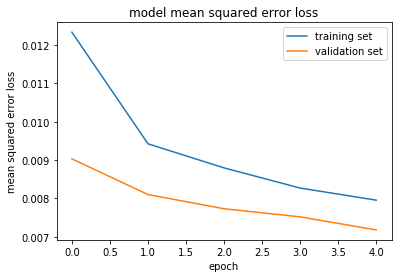

In [8]:
# Build network architecture 
# for a regression network (need only 1 neuron at output)
from keras.models import Sequential, Model
#from keras.layers import Lambda, Cropping2D
from keras.layers.core import Flatten, Dense, Activation, Dropout, Lambda
from keras.activations import relu 
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.backend import tf as ktf
from keras.callbacks import ModelCheckpoint

row, col, ch = 160, 320, 3  # image format
INPUT_SHAPE = (row,col,ch)

def resize(image):
    from keras.backend import tf as ktf   
    resized = ktf.image.resize_images(image, (66, 200))
    return resized

# Create the Sequential model
model = Sequential()

## Set up lambda layers for data preprocessing: 

# Set up cropping2D layer: cropping (top, bottom) (left, right) pixels 
model.add(Cropping2D(cropping=((60,25), (0,0)), input_shape=INPUT_SHAPE)) 

# Add Lambda layer for resizing image (image, height, width, data_format)
# model.add(Lambda(lambda x: ktf.image.resize_images(x, new_shape)))
model.add(Lambda(resize, input_shape=(75, 320, 3), output_shape=(66, 200, 3)))

# Add Lambda layer for normalization
model.add(Lambda(lambda x: (x / 127.5) - 1.0))

## Build a Multi-layer feedforward neural network with Keras here.

# 1st Layer - Add a convolution layer
model.add(Convolution2D(24, 5, 5, subsample=(2,2), activation='relu'))

# 2nd Layer - Add a convolution layer
model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='relu'))

# 3rd Layer - Add a convolution layer
model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='relu'))

# 4th Layer - Add a convolution layer
model.add(Convolution2D(64, 3, 3, activation='relu'))

# 5th Layer - Add a convolution layer
model.add(Convolution2D(64, 3, 3, activation='relu'))

# 6th Layer - Add a convolution layer
model.add(Dropout(0.5))

# 7th Layer - Add a flatten layer
model.add(Flatten())

# 8th Layer - Add a fully connected layer
model.add(Dense(100, activation='relu'))

# 9th Layer - Add a fully connected layer
model.add(Dense(50, activation='relu'))

# 10th Layer - Add a fully connected layer
model.add(Dense(10, activation='relu'))

# 11th Layer - Add a fully connected layer
model.add(Dense(1))

model.summary()

# saves the model weights after each epoch if the validation loss decreased
checkpointer = ModelCheckpoint('model-{epoch:02d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')
# Compile and train the model
model.compile(optimizer='adam', loss='mse', verbose = 1)
# history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7, batch_size=128)
history_object = model.fit_generator(train_generator, samples_per_epoch=len(train_samples), \
                                     validation_data=validation_generator, nb_val_samples=len(validation_samples), \
                                     nb_epoch=10, callbacks=[checkpointer], verbose=1)

#model.save('model.h5')

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

### Run the network

I run the network on the pre-trained model with the following command:

    python drive.py model.h5
    
And run the simulator with the Autonomous mode. The output video was recorded.

### Output

Link to the output video.